# **About the Dataset**

### **Context**


IIoT 4.0 is coming to cover all enterprise monitoring and maintenance system. Thus, we need bold and sustainable algorithms and approaches to analyze the IOT sensor data and find hidden patterns and insights. Heat Index ( temperature + humidity ) is one common data recorded on these IOT readers. The frequency of the upcoming data is very fast. The sensor reads hundreds to millions of data per second. There is a huge and versatile application of this data in real world. like:- Agriculture, weather forecasting, soil monitoring and treatment, enterprise maintenance, Data centres, and many more
Therefore, Wrangling, analyzing, and grasping insights from these data are equally important for multiple application sectors. This dataset is a small snap ( sample) out of ocean-depth entries in the original dataset, which keeps increasing day by day. The purpose of this dataset is to allow fellow Scientists/ Analysts to play and Find the unfounds. 🙏…

### **Content**

This dataset contains the temperature readings from IOT devices installed outside and inside of an anonymous Room (say - admin room). The device was in the alpha testing phase. So, It was uninstalled or shut off several times during the entire reading period ( 28-07-2018 to 08-12-2018). This random interval recordings and few mis-readings ( outliers) makes it more challanging to perform analysis on this data. Let's see, what you can present in the plate out of this messy data.

# **Task**

**From this dataset , it would be intersting to find out:**
- what was the max and min temperature?
-How outside temperature was related to inside temperature? any relation between the two?

- What was the variance of temperature for inside and outside room temperature?

- What is the trend in the data?

- Can you use Time Series Forecast algo to predict the next scenario?

- which was the hottest/coolest month ?

- any warning signals fro climate disaster ?

# **Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# **Data Preparation**

In [5]:
data= pd.DataFrame(pd.read_csv('IOT-temp.csv'))
data.columns

Index(['id', 'room_id/id', 'noted_date', 'temp', 'out/in'], dtype='object')

In [6]:
data

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [7]:
data['room_id/id'].value_counts()

room_id/id
Room Admin    97606
Name: count, dtype: int64

In [8]:
clean_data = data.drop(columns = ['id','room_id/id'])
clean_data.columns

Index(['noted_date', 'temp', 'out/in'], dtype='object')

In [9]:
clean_data = clean_data.set_index('noted_date')
clean_data

,temp,out/in
noted_date,,
08-12-2018 09:30,29,In
08-12-2018 09:30,29,In
08-12-2018 09:29,41,Out
08-12-2018 09:29,41,Out
08-12-2018 09:29,31,In
...,...,...
28-07-2018 07:07,31,In
28-07-2018 07:07,31,In
28-07-2018 07:06,31,In


In [10]:
clean_data.index = pd.to_datetime(clean_data.index,
                                  format = "%d-%m-%Y %H:%M")
clean_data.index.dtype

dtype('<M8[ns]')

In [11]:
clean_data

,temp,out/in
noted_date,,
2018-12-08 09:30:00,29,In
2018-12-08 09:30:00,29,In
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,31,In
...,...,...
2018-07-28 07:07:00,31,In
2018-07-28 07:07:00,31,In
2018-07-28 07:06:00,31,In


# **Expoloratory Data Analysis**

## **Data Analysis Base Data**

In [12]:
clean_data

,temp,out/in
noted_date,,
2018-12-08 09:30:00,29,In
2018-12-08 09:30:00,29,In
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,31,In
...,...,...
2018-07-28 07:07:00,31,In
2018-07-28 07:07:00,31,In
2018-07-28 07:06:00,31,In


In [13]:
date_2018_12_08_0929 = clean_data.loc[(clean_data.index == '2018-12-08 09:29:00')]
date_2018_12_08_0929

,temp,out/in
noted_date,,
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,31,In
2018-12-08 09:29:00,31,In


## **Feature Creation**

In [11]:
clean_data

,temp,out/in
noted_date,,
2018-12-08 09:30:00,29,In
2018-12-08 09:30:00,29,In
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,31,In
...,...,...
2018-07-28 07:07:00,31,In
2018-07-28 07:07:00,31,In
2018-07-28 07:06:00,31,In


In [73]:
clean_data

,temp,out/in
noted_date,,
2018-12-08 09:30:00,29,In
2018-12-08 09:30:00,29,In
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,41,Out
2018-12-08 09:29:00,31,In
...,...,...
2018-07-28 07:07:00,31,In
2018-07-28 07:07:00,31,In
2018-07-28 07:06:00,31,In


In [12]:
def create_features(df):
    df=df.copy()
    df['minutes']=df.index.minute
    df['hour']=df.index.hour
    df['day_of_the_month']=df.index.day #1,2,3,4,...,31
    df['day_of_the_week']=df.index.dayofweek #{0:Monday, 1:Tuesday...}
    df['day_of_the_year']=df.index.dayofyear # Xposition out of 365
    df['month'] = df.index.month
    return df

In [13]:
feature_data = create_features(clean_data)
feature_data

,temp,out/in,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month
noted_date,,,,,,,,
2018-12-08 09:30:00,29,In,30,9,8,5,342,12
2018-12-08 09:30:00,29,In,30,9,8,5,342,12
2018-12-08 09:29:00,41,Out,29,9,8,5,342,12
2018-12-08 09:29:00,41,Out,29,9,8,5,342,12
2018-12-08 09:29:00,31,In,29,9,8,5,342,12
...,...,...,...,...,...,...,...,...
2018-07-28 07:07:00,31,In,7,7,28,5,209,7
2018-07-28 07:07:00,31,In,7,7,28,5,209,7
2018-07-28 07:06:00,31,In,6,7,28,5,209,7


## **Feature Relationship**

In [16]:
feature_data

,temp,out/in,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month
noted_date,,,,,,,,
2018-12-08 09:30:00,29,In,30,9,8,5,342,12
2018-12-08 09:30:00,29,In,30,9,8,5,342,12
2018-12-08 09:29:00,41,Out,29,9,8,5,342,12
2018-12-08 09:29:00,41,Out,29,9,8,5,342,12
2018-12-08 09:29:00,31,In,29,9,8,5,342,12
...,...,...,...,...,...,...,...,...
2018-07-28 07:07:00,31,In,7,7,28,5,209,7
2018-07-28 07:07:00,31,In,7,7,28,5,209,7
2018-07-28 07:06:00,31,In,6,7,28,5,209,7


In [17]:
def createBoxPlot(column,dataframe):
    fig,ax=plt.subplots(figsize = (15,10))
    sns.boxplot(data=dataframe, x=column,
                y='temp',hue=dataframe['out/in'])
    ax.set_title('Temperature by ' + column)
    plt.show()

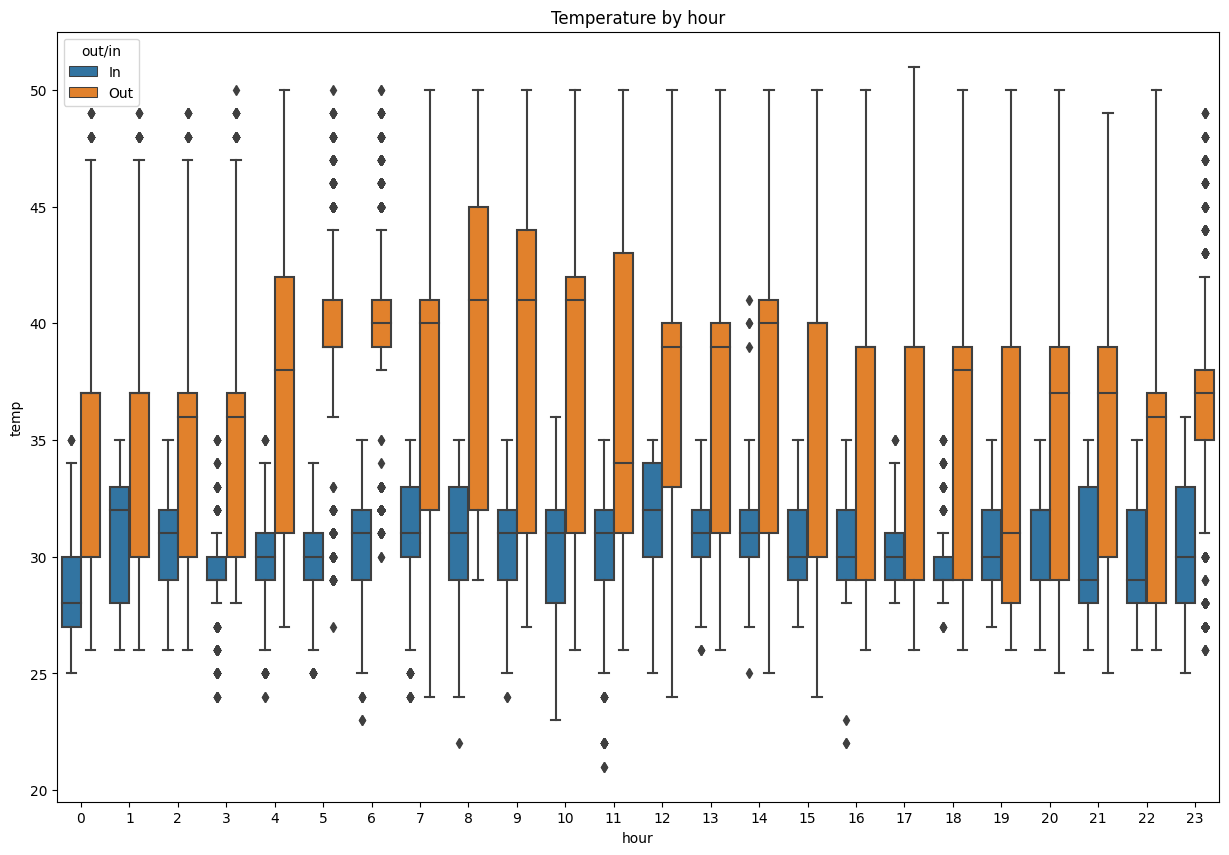

In [18]:
createBoxPlot('hour', feature_data)

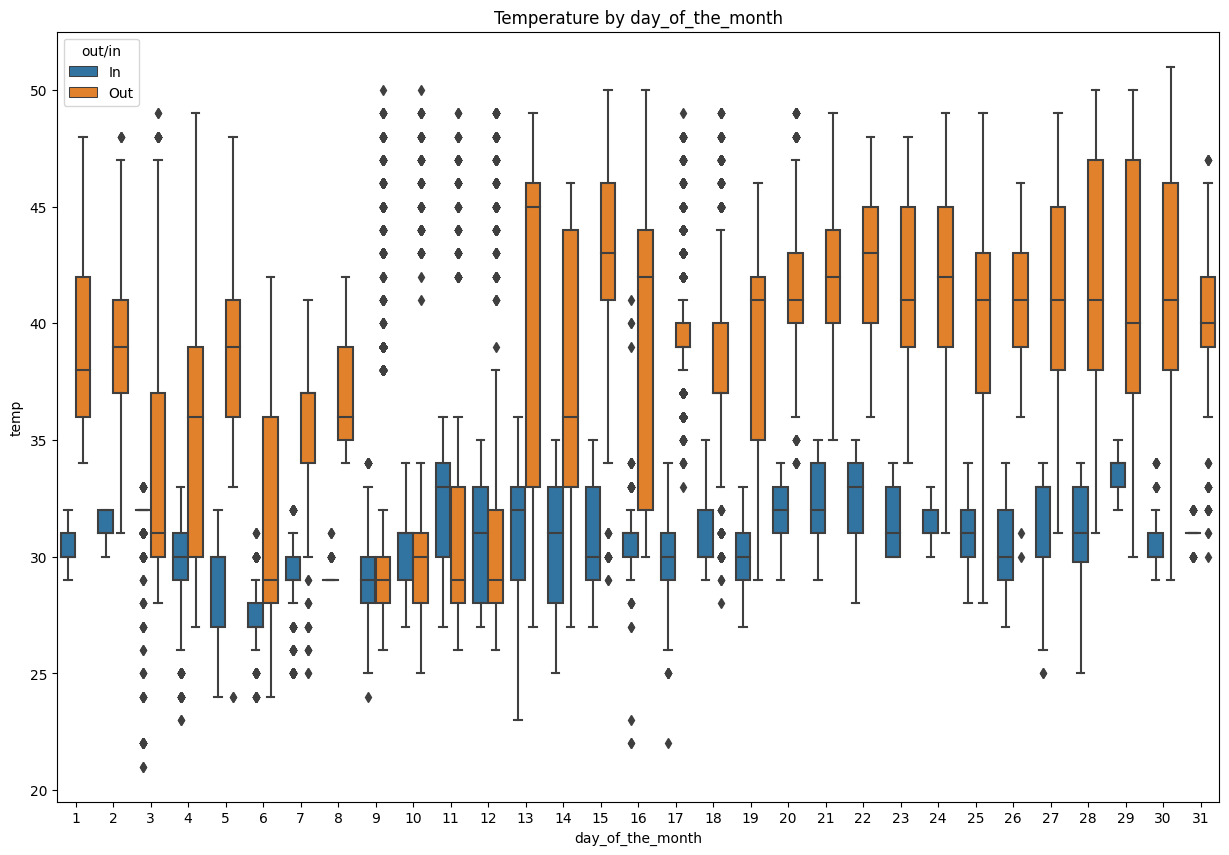

In [20]:
createBoxPlot('day_of_the_month', feature_data)

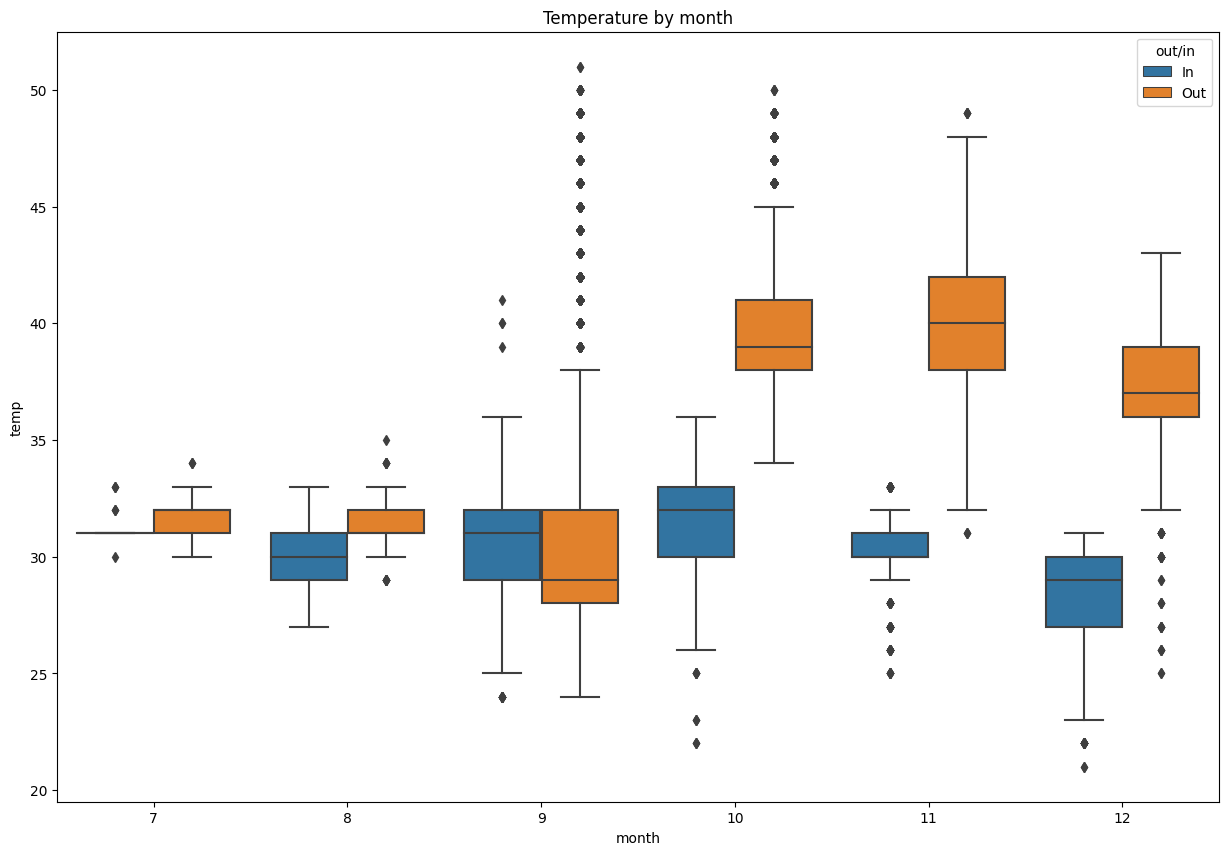

In [21]:
createBoxPlot('month', feature_data)

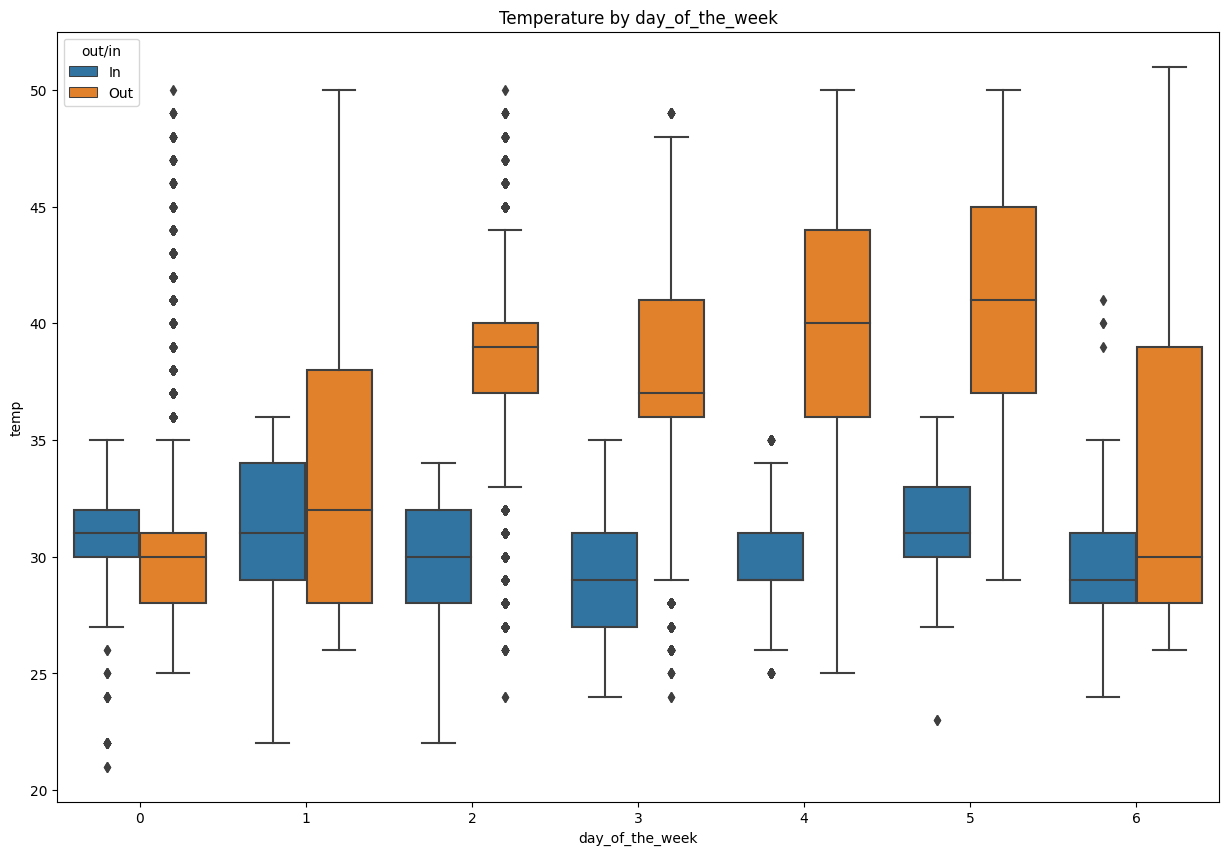

In [22]:
createBoxPlot('day_of_the_week', feature_data)

# **Model Creation**

## **Train-Test Split**

In [23]:
feature_data

,temp,out/in,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month
noted_date,,,,,,,,
2018-12-08 09:30:00,29,In,30,9,8,5,342,12
2018-12-08 09:30:00,29,In,30,9,8,5,342,12
2018-12-08 09:29:00,41,Out,29,9,8,5,342,12
2018-12-08 09:29:00,41,Out,29,9,8,5,342,12
2018-12-08 09:29:00,31,In,29,9,8,5,342,12
...,...,...,...,...,...,...,...,...
2018-07-28 07:07:00,31,In,7,7,28,5,209,7
2018-07-28 07:07:00,31,In,7,7,28,5,209,7
2018-07-28 07:06:00,31,In,6,7,28,5,209,7


**one hot encoding**

In [24]:
feature_data = pd.get_dummies(feature_data, columns=['out/in'])
feature_data = feature_data.astype(int)
feature_data

,temp,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month,out/in_In,out/in_Out
noted_date,,,,,,,,,
2018-12-08 09:30:00,29,30,9,8,5,342,12,1,0
2018-12-08 09:30:00,29,30,9,8,5,342,12,1,0
2018-12-08 09:29:00,41,29,9,8,5,342,12,0,1
2018-12-08 09:29:00,41,29,9,8,5,342,12,0,1
2018-12-08 09:29:00,31,29,9,8,5,342,12,1,0
...,...,...,...,...,...,...,...,...,...
2018-07-28 07:07:00,31,7,7,28,5,209,7,1,0
2018-07-28 07:07:00,31,7,7,28,5,209,7,1,0
2018-07-28 07:06:00,31,6,7,28,5,209,7,1,0


In [25]:
feature_data = feature_data.rename(columns={
    "out/in_In": "in",
    "out/in_Out": "out"
})
feature_data

,temp,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month,in,out
noted_date,,,,,,,,,
2018-12-08 09:30:00,29,30,9,8,5,342,12,1,0
2018-12-08 09:30:00,29,30,9,8,5,342,12,1,0
2018-12-08 09:29:00,41,29,9,8,5,342,12,0,1
2018-12-08 09:29:00,41,29,9,8,5,342,12,0,1
2018-12-08 09:29:00,31,29,9,8,5,342,12,1,0
...,...,...,...,...,...,...,...,...,...
2018-07-28 07:07:00,31,7,7,28,5,209,7,1,0
2018-07-28 07:07:00,31,7,7,28,5,209,7,1,0
2018-07-28 07:06:00,31,6,7,28,5,209,7,1,0


In [38]:
feature_data = feature_data.sort_index()
train_data = feature_data.iloc[0:68324,:]
test_data = feature_data.iloc[68324:,:]

In [39]:
list(feature_data.columns)

['temp',
 'minutes',
 'hour',
 'day_of_the_month',
 'day_of_the_week',
 'day_of_the_year',
 'month',
 'in',
 'out']

In [44]:
model_features = ['minutes','hour','day_of_the_month',
                  'day_of_the_week','day_of_the_year','month',
                  'in','out']
target = 'temp'

X_train = train_data[model_features]
Y_train = train_data[target]

X_test = test_data[model_features]
Y_test = test_data[target]

## **Model**

In [49]:
def evaluationGraph(model):
    evals_result = model.evals_result()
    rmse_train = evals_result['validation_0']['rmse']
    rmse_test = evals_result['validation_1']['rmse']
    
    # Create a range of x values for the number of iterations
    x_values = range(1, len(rmse_train) + 1)
    
    # Plot the RMSE values
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, rmse_train, label='Train RMSE', marker='o')
    plt.plot(x_values, rmse_test, label='Test RMSE', marker='o')
    
    # Find the iteration where test RMSE starts to increase
    for i in range(1, len(rmse_test)):
        if rmse_test[i] > rmse_test[i - 1]:
            break
    
    for j in range(1, len(rmse_train)):
        if rmse_train[i] > rmse_train[i-1]:
            break
    # Add a vertical line at the point where test RMSE starts to increase
    plt.axvline(x=i, color='r', linestyle='--', label='Test RMSE Increase')
    
    # Add a vertical line at the point where test RMSE starts to increase
    plt.axvline(x=j, color='b', linestyle='--', label='Train RMSE Increase')
    
    # Add labels and a legend
    plt.xlabel('Number of Iterations')
    plt.ylabel('RMSE')
    plt.title('RMSE vs. Number of Iterations')
    plt.legend()
    
    # Show the plot
    plt.show()
    print(f'Testing Model starts to overfit at iteration {i}')
    print(f'Training Model starts to overfit at iteration {j}')    

In [53]:
reg_v1=xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50)
reg_v1.fit(X_train,Y_train, 
           eval_set = [(X_train,Y_train), (X_test,Y_test)],
           verbose = 100)

[0]	validation_0-rmse:23.78766	validation_1-rmse:26.10741
[57]	validation_0-rmse:0.52860	validation_1-rmse:4.26838


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

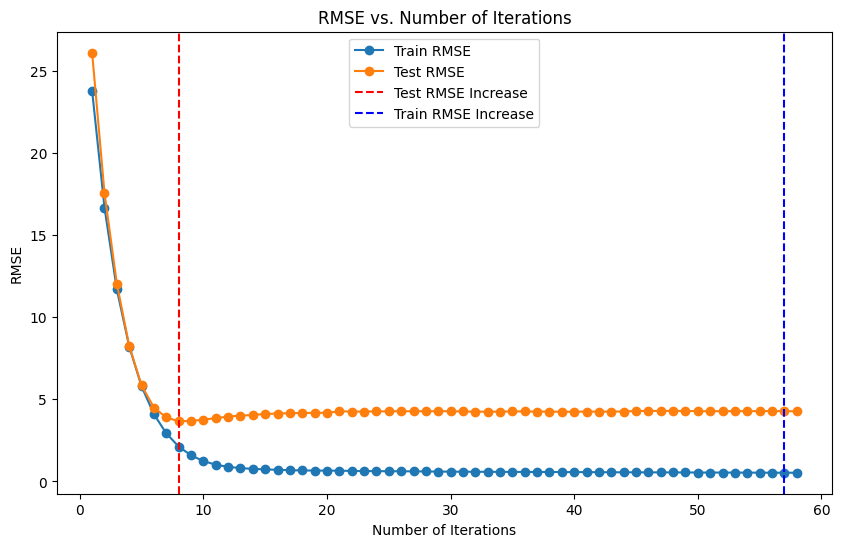

Testing Model starts to overfit at iteration 8
Training Model starts to overfit at iteration 57


In [52]:
evaluationGraph(reg_v1)

In [56]:
reg_v2=xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50,
                       learning_rate = 0.01,max_depth = 2,)
reg_v2.fit(X_train,Y_train, 
           eval_set = [(X_train,Y_train), (X_test,Y_test)],
           verbose = 100)

[0]	validation_0-rmse:33.61970	validation_1-rmse:37.00011
[100]	validation_0-rmse:12.48546	validation_1-rmse:12.52255
[200]	validation_0-rmse:4.96182	validation_1-rmse:4.52078
[300]	validation_0-rmse:2.52552	validation_1-rmse:3.34649
[339]	validation_0-rmse:2.16279	validation_1-rmse:3.42768


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

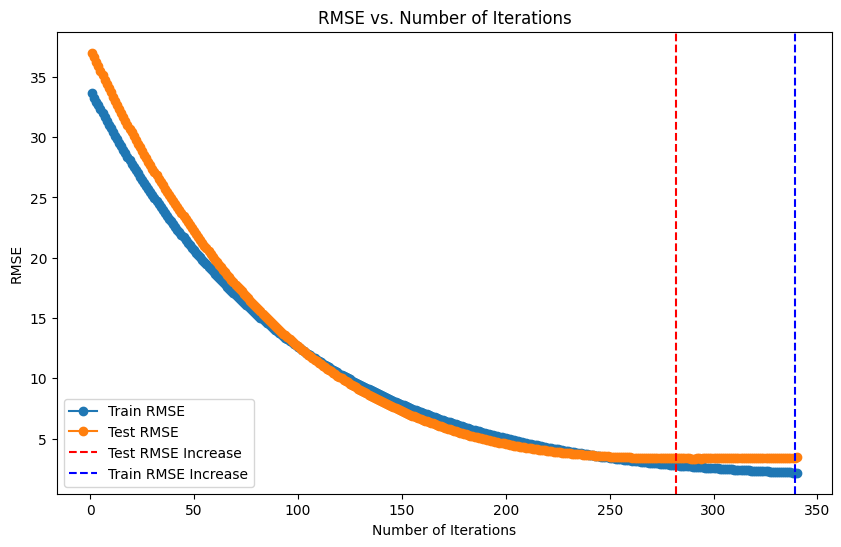

Testing Model starts to overfit at iteration 282
Training Model starts to overfit at iteration 339


In [57]:
evaluationGraph(reg_v2)

# **Feature Imporantance**

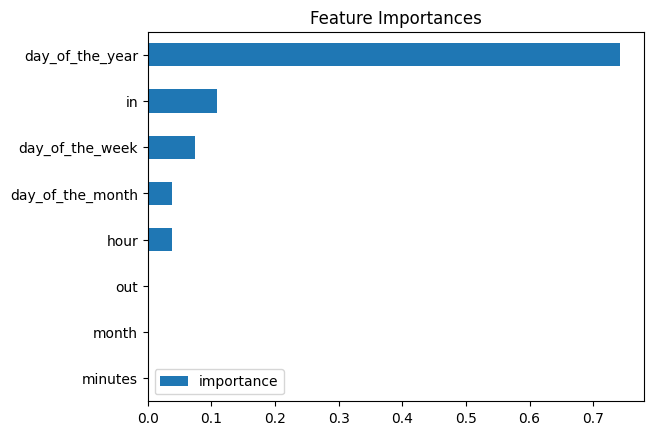

In [61]:
feature_importance = pd.DataFrame(data=reg_v2.feature_importances_,
                                 index = reg_v2.feature_names_in_,
                                 columns=['importance'])
feature_importance.sort_values('importance').plot(kind='barh',
                                                title='Feature Importances')
plt.show()

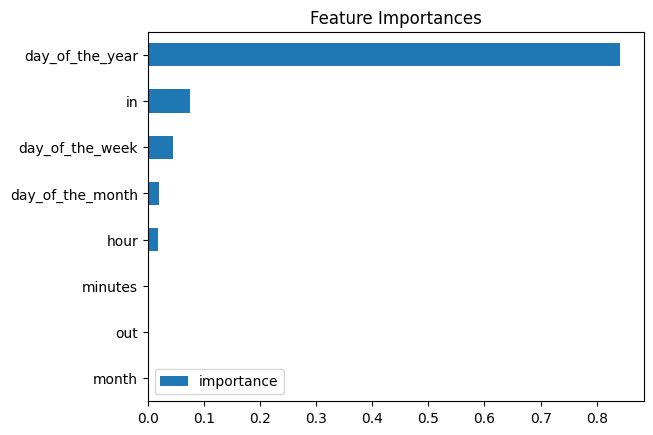

In [62]:
feature_importance = pd.DataFrame(data=reg_v1.feature_importances_,
                                 index = reg_v1.feature_names_in_,
                                 columns=['importance'])
feature_importance.sort_values('importance').plot(kind='barh',
                                                title='Feature Importances')
plt.show()

# **Predict or Forecast**

In [67]:
#merge data
test_data['prediction'] = reg_v2.predict(X_test)
feature_data = feature_data.merge(test_data[['prediction']],
                                how='left', left_index=True,
                                right_index=True)
feature_data

C:\Users\ugayj\AppData\Local\Temp\ipykernel_20376\284236137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = reg_v2.predict(X_test)


,temp,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month,in,out,prediction
noted_date,,,,,,,,,,
2018-07-28 07:06:00,31,6,7,28,5,209,7,1,0,NaN
2018-07-28 07:06:00,31,6,7,28,5,209,7,1,0,NaN
2018-07-28 07:06:00,31,6,7,28,5,209,7,1,0,NaN
2018-07-28 07:07:00,31,7,7,28,5,209,7,1,0,NaN
2018-07-28 07:07:00,31,7,7,28,5,209,7,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-08 09:29:00,41,29,9,8,5,342,12,0,1,39.492863
2018-12-08 09:30:00,29,30,9,8,5,342,12,1,0,32.740475
2018-12-08 09:30:00,29,30,9,8,5,342,12,1,0,32.740475


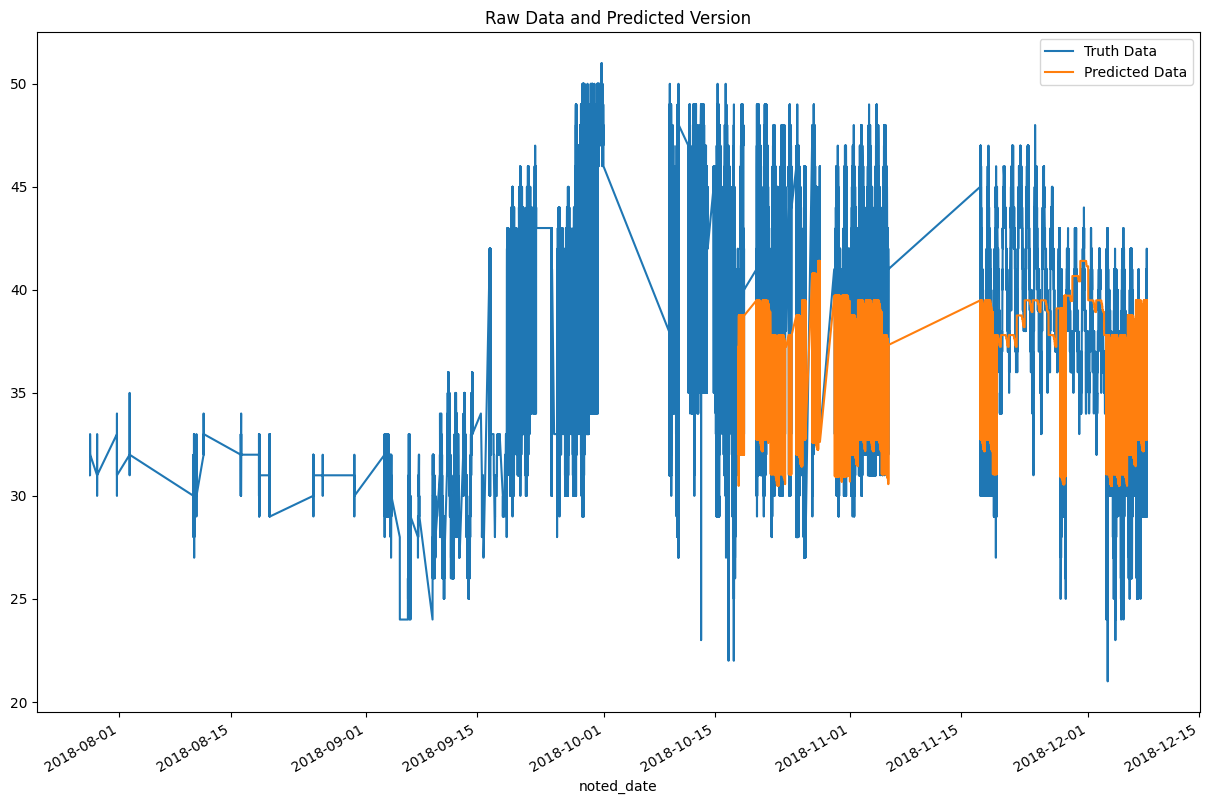

In [70]:
#graph
ax=feature_data[['temp']].plot(figsize=(15,10))
feature_data['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predicted Data'])
ax.set_title('Raw Data and Predicted Version')
plt.show()

In [72]:
score = np.sqrt(mean_squared_error(test_data['temp'], test_data['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3.34
